<a href="https://colab.research.google.com/github/Bborub/bk-bridge-pedestrian/blob/main/US_Median_Income_Cluster_090624.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

# Load the data from the Excel file
df = pd.read_excel("Real_Median_Personal_Income_in_the_United_States_x.xlsx")

# Display the first few rows and column names
print(df.head())
print(df.columns)

        DATE  MEHOINUSAKA672N  MEHOINUSALA672N  MEHOINUSARA672N  \
0 1984-01-01            81970            43850            39710   
1 1985-01-01            85210            44910            42750   
2 1986-01-01            75580            46110            45150   
3 1987-01-01            77480            46010            43890   
4 1988-01-01            74430            44850            45350   

   MEHOINUSAZA672N  MEHOINUSCAA672N  MEHOINUSCOA672N  MEHOINUSCTA672N  \
0            54270            64060            65360            75870   
1            58500            66100            69040            76170   
2            61460            69920            65540            78870   
3            62360            70280            61730            76620   
4            59430            68090            58940            81420   

   MEHOINUSDEA672N  MEHOINUSFLA672N  ...  MEHOINUSSDA672N  MEHOINUSTNA672N  \
0            65410            50120  ...            49170            42510   
1 

In [4]:
df.tail()

,DATE,MEHOINUSAKA672N,MEHOINUSALA672N,MEHOINUSARA672N,MEHOINUSAZA672N,MEHOINUSCAA672N,MEHOINUSCOA672N,MEHOINUSCTA672N,MEHOINUSDEA672N,MEHOINUSFLA672N,...,MEHOINUSSDA672N,MEHOINUSTNA672N,MEHOINUSTXA672N,MEHOINUSUTA672N,MEHOINUSVAA672N,MEHOINUSVTA672N,MEHOINUSWAA672N,MEHOINUSWIA672N,MEHOINUSWVA672N,MEHOINUSWYA672N
34,2018-01-01,79450,57720,57540,71990,81480,84420,84160,75140,63160,...,68730,64800,69100,89080,89180,80990,92150,72390,58460,72290
35,2019-01-01,89290,64010,62120,80500,88960,82580,99420,84510,66480,...,73190,64500,76820,96270,92610,84630,93910,76720,61170,74190
36,2020-01-01,84260,61650,57240,75620,87530,94440,89540,78930,65110,...,79120,61970,77110,94680,92670,75810,91710,75980,58580,73780
37,2021-01-01,87490,61390,54760,76370,87960,91610,87300,74070,64410,...,79680,67030,72680,94510,86550,82040,94510,75420,50500,76620
38,2022-01-01,89740,59910,53980,73450,85300,89930,90730,80750,65370,...,67180,65380,74640,95800,85170,72190,89430,73330,52460,73090


In [5]:

import re

# Load the data
df = pd.read_excel("Real_Median_Personal_Income_in_the_United_States_x.xlsx")

# Dictionary of state abbreviations to full names
state_names = {
    'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AZ': 'Arizona', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'MA': 'Massachusetts', 'MD': 'Maryland',
    'ME': 'Maine', 'MI': 'Michigan', 'MN': 'Minnesota', 'MO': 'Missouri', 'MS': 'Mississippi',
    'MT': 'Montana', 'NC': 'North Carolina', 'ND': 'North Dakota', 'NE': 'Nebraska', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NV': 'Nevada', 'NY': 'New York', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VA': 'Virginia',
    'VT': 'Vermont', 'WA': 'Washington', 'WI': 'Wisconsin', 'WV': 'West Virginia', 'WY': 'Wyoming'
}

# Function to extract state abbreviation and map to full name
def get_state_name(column_name):
    match = re.search(r'MEHOINUS(\w{2})672N', column_name)
    if match:
        state_abbr = match.group(1)
        return state_names.get(state_abbr, column_name)
    return column_name

# Rename the columns
df.columns = [get_state_name(col) for col in df.columns]

# Convert 'DATE' column to datetime and set as index
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Display the first few rows of the cleaned dataframe
print(df.head())
print(df.columns)

            MEHOINUSAKA672N  MEHOINUSALA672N  MEHOINUSARA672N  \
DATE                                                            
1984-01-01            81970            43850            39710   
1985-01-01            85210            44910            42750   
1986-01-01            75580            46110            45150   
1987-01-01            77480            46010            43890   
1988-01-01            74430            44850            45350   

            MEHOINUSAZA672N  MEHOINUSCAA672N  MEHOINUSCOA672N  \
DATE                                                            
1984-01-01            54270            64060            65360   
1985-01-01            58500            66100            69040   
1986-01-01            61460            69920            65540   
1987-01-01            62360            70280            61730   
1988-01-01            59430            68090            58940   

            MEHOINUSCTA672N  MEHOINUSDEA672N  MEHOINUSFLA672N  \
DATE                   

In [6]:
# Function to extract state name from column name
def get_state_name(column_name):
    match = re.search(r'MEHOINUS(.+?)672N', column_name)
    if match:
        state_code = match.group(1)
        # Convert state code to title case and remove 'A' at the end
        return state_code[:-1].title()
    return column_name

# Rename the columns
df.columns = [get_state_name(col) for col in df.columns]

# Print column names to check
print("Column names after renaming:")
print(df.columns)

# Find the date column (it might not be named 'DATE')
date_column = df.columns[0]  # Assume the first column is the date column

# Convert date column to datetime and set as index
df[date_column] = pd.to_datetime(df[date_column])
df.set_index(date_column, inplace=True)

# Display the first few rows of the cleaned dataframe
print("\nFirst few rows of the cleaned dataframe:")
print(df.head())

# Display the column names again
print("\nFinal column names:")
print(df.columns)

Column names after renaming:
Index(['Ak', 'Al', 'Ar', 'Az', 'Ca', 'Co', 'Ct', 'De', 'Fl', 'Ga', 'Hi', 'Ia',
       'Id', 'Il', 'In', 'Ks', 'Ky', 'La', 'Ma', 'Md', 'Me', 'Mi', 'Mn', 'Mo',
       'Ms', 'Mt', 'Nc', 'Nd', 'Ne', 'Nh', 'Nj', 'Nm', 'Nv', 'Ny', 'Oh', 'Ok',
       'Or', 'Pa', 'Ri', 'Sc', 'Sd', 'Tn', 'Tx', 'Ut', 'Va', 'Vt', 'Wa', 'Wi',
       'Wv', 'Wy'],
      dtype='object')

First few rows of the cleaned dataframe:
                                  Al     Ar     Az     Ca     Co     Ct  \
Ak                                                                        
1970-01-01 00:00:00.000081970  43850  39710  54270  64060  65360  75870   
1970-01-01 00:00:00.000085210  44910  42750  58500  66100  69040  76170   
1970-01-01 00:00:00.000075580  46110  45150  61460  69920  65540  78870   
1970-01-01 00:00:00.000077480  46010  43890  62360  70280  61730  76620   
1970-01-01 00:00:00.000074430  44850  45350  59430  68090  58940  81420   

                                  De     Fl  

In [7]:
# Function to extract state name from column name
def get_state_name(column_name):
    match = re.search(r'MEHOINUS(.+?)672N', column_name)
    if match:
        state_code = match.group(1)
        # Convert state code to uppercase and remove 'A' at the end
        return state_code[:-1].upper()
    return column_name

# Rename the columns
df.columns = [get_state_name(col) for col in df.columns]

# Print column names to check
print("Column names after renaming:")
print(df.columns)

# Find the date column (it might not be named 'DATE')
date_column = df.columns[0]  # Assume the first column is the date column

# Convert date column to datetime and set as index
df[date_column] = pd.to_datetime(df[date_column])
df.set_index(date_column, inplace=True)

# Display the first few rows of the cleaned dataframe
print("\nFirst few rows of the cleaned dataframe:")
print(df.head())

# Display the column names again
print("\nFinal column names:")
print(df.columns)

Column names after renaming:
Index(['Al', 'Ar', 'Az', 'Ca', 'Co', 'Ct', 'De', 'Fl', 'Ga', 'Hi', 'Ia', 'Id',
       'Il', 'In', 'Ks', 'Ky', 'La', 'Ma', 'Md', 'Me', 'Mi', 'Mn', 'Mo', 'Ms',
       'Mt', 'Nc', 'Nd', 'Ne', 'Nh', 'Nj', 'Nm', 'Nv', 'Ny', 'Oh', 'Ok', 'Or',
       'Pa', 'Ri', 'Sc', 'Sd', 'Tn', 'Tx', 'Ut', 'Va', 'Vt', 'Wa', 'Wi', 'Wv',
       'Wy'],
      dtype='object')

First few rows of the cleaned dataframe:
                                  Ar     Az     Ca     Co     Ct     De  \
Al                                                                        
1970-01-01 00:00:00.000043850  39710  54270  64060  65360  75870  65410   
1970-01-01 00:00:00.000044910  42750  58500  66100  69040  76170  56300   
1970-01-01 00:00:00.000046110  45150  61460  69920  65540  78870  61770   
1970-01-01 00:00:00.000046010  43890  62360  70280  61730  76620  68180   
1970-01-01 00:00:00.000044850  45350  59430  68090  58940  81420  68580   

                                  Fl     Ga     Hi 

In [8]:
# Function to extract state name from column name
def get_state_name(column_name):
    match = re.search(r'MEHOINUS(\w{2})A672N', column_name)
    if match:
        state_code = match.group(1)
        # The state code is already in uppercase, so we just return it
        return state_code
    return column_name

# Rename the columns
df.columns = [get_state_name(col) for col in df.columns]

# Print column names to check
print("Column names after renaming:")
print(df.columns)

# Find the date column (it might not be named 'DATE')
date_column = df.columns[0]  # Assume the first column is the date column

# Convert date column to datetime and set as index
df[date_column] = pd.to_datetime(df[date_column])
df.set_index(date_column, inplace=True)

# Display the first few rows of the cleaned dataframe
print("\nFirst few rows of the cleaned dataframe:")
print(df.head())

# Display the column names again
print("\nFinal column names:")
print(df.columns)

Column names after renaming:
Index(['Ar', 'Az', 'Ca', 'Co', 'Ct', 'De', 'Fl', 'Ga', 'Hi', 'Ia', 'Id', 'Il',
       'In', 'Ks', 'Ky', 'La', 'Ma', 'Md', 'Me', 'Mi', 'Mn', 'Mo', 'Ms', 'Mt',
       'Nc', 'Nd', 'Ne', 'Nh', 'Nj', 'Nm', 'Nv', 'Ny', 'Oh', 'Ok', 'Or', 'Pa',
       'Ri', 'Sc', 'Sd', 'Tn', 'Tx', 'Ut', 'Va', 'Vt', 'Wa', 'Wi', 'Wv', 'Wy'],
      dtype='object')

First few rows of the cleaned dataframe:
                                  Az     Ca     Co     Ct     De     Fl  \
Ar                                                                        
1970-01-01 00:00:00.000039710  54270  64060  65360  75870  65410  50120   
1970-01-01 00:00:00.000042750  58500  66100  69040  76170  56300  52290   
1970-01-01 00:00:00.000045150  61460  69920  65540  78870  61770  55070   
1970-01-01 00:00:00.000043890  62360  70280  61730  76620  68180  57100   
1970-01-01 00:00:00.000045350  59430  68090  58940  81420  68580  57120   

                                  Ga     Hi     Ia     Id  ...  

In [9]:
# Display a random sample of 10 observations (just the features)
features = df[df.columns[0:6]]
features.sample(10)

,Az,Ca,Co,Ct,De,Fl
Ar,,,,,,
1970-01-01 00:00:00.000047650,55580,68180,71940,73990,69050,53830
1970-01-01 00:00:00.000039710,54270,64060,65360,75870,65410,50120
1970-01-01 00:00:00.000058660,70390,82580,88420,87620,76600,62600
1970-01-01 00:00:00.000046800,60020,68370,63120,79830,63270,54810
1970-01-01 00:00:00.000048660,62590,74960,75930,83570,74530,59250
1970-01-01 00:00:00.000051890,65040,73010,75480,81730,71270,60120
1970-01-01 00:00:00.000052840,65220,74610,72720,81930,73860,61970
1970-01-01 00:00:00.000045350,59430,68090,58940,81420,68580,57120
1970-01-01 00:00:00.000057240,75620,87530,94440,89540,78930,65110


In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[df.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[-0.81496917, -0.0435202 ],
       [-0.70725327, -0.08182764],
       [-0.45000869,  0.08283764],
       [-0.36916273,  0.11957087],
       [-0.42482708,  0.26420109],
       [-0.24526674,  0.53234102],
       [-0.50831588,  0.1428713 ],
       [-0.4955287 ,  0.24539732],
       [-0.58201055,  0.10573769],
       [-0.64637599, -0.04312713]])

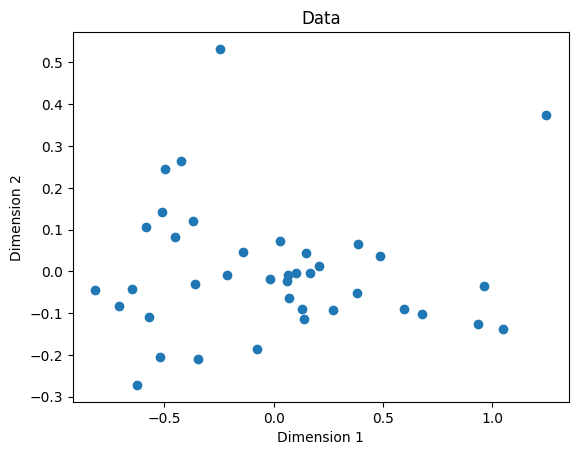

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

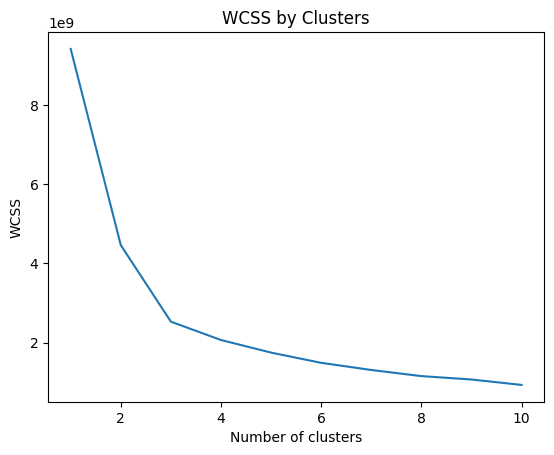

In [12]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)

#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:


# Display a random sample of 10 observations (just the features)
features = df[df.columns[0:6]]
features.sample(10)

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[df.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[-0.81496917, -0.0435202 ],
       [-0.70725327, -0.08182764],
       [-0.45000869,  0.08283764],
       [-0.36916273,  0.11957087],
       [-0.42482708,  0.26420109],
       [-0.24526674,  0.53234102],
       [-0.50831588,  0.1428713 ],
       [-0.4955287 ,  0.24539732],
       [-0.58201055,  0.10573769],
       [-0.64637599, -0.04312713]])

In [14]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)
# View the cluster assignments
km_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

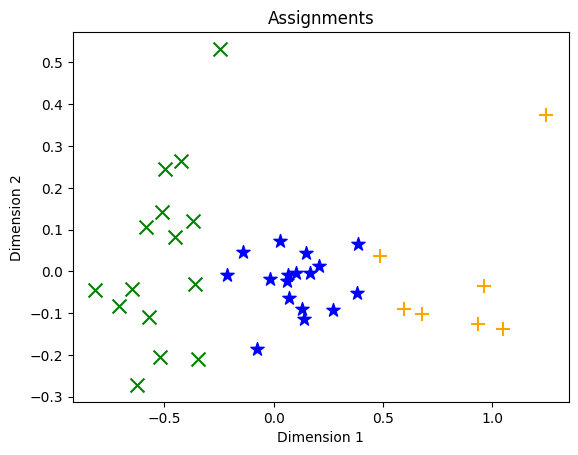

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


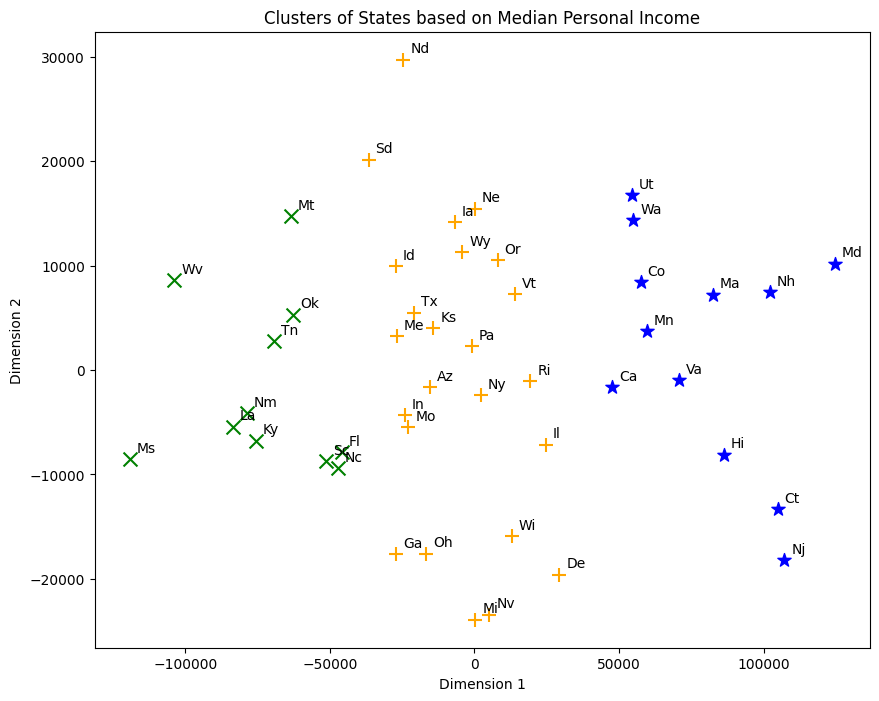

In [16]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_clusters(samples, clusters, state_names):
    plt.figure(figsize=(10, 8))
    col_dic = {0:'blue', 1:'green', 2:'orange'}
    mrk_dic = {0:'*', 1:'x', 2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color=colors[sample], marker=markers[sample], s=100)
        plt.annotate(state_names[sample], (samples[sample][0], samples[sample][1]), xytext=(5, 5), textcoords='offset points')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Clusters of States based on Median Personal Income')
    plt.show()

# Assuming 'df' is your dataframe with state incomes over time

# Transpose the dataframe so states are rows and dates are columns
df_transposed = df.transpose()

# Use all columns except the first (which would be the state names) as features
features = df_transposed.iloc[:, 1:]

# Perform clustering (let's say we want 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features)

# Perform dimensionality reduction
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features)

# Now you can use these in your clustering and plotting functions
plot_clusters(features_2d, cluster_labels, df_transposed.index)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


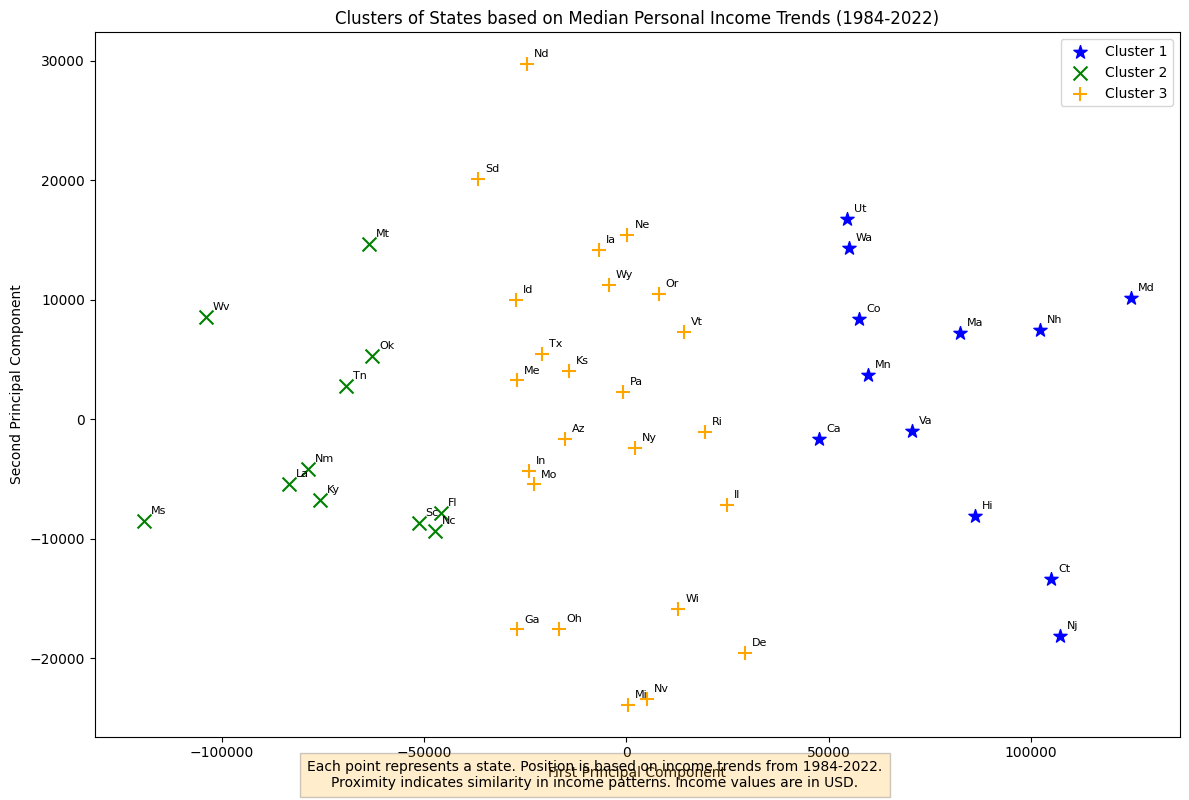

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe with state incomes over time

# Transpose the dataframe so states are rows and dates are columns
df_transposed = df.transpose()

# Use all columns except the first (which would be the state names) as features
features = df_transposed.iloc[:, 1:]

# Perform clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features)

# Perform dimensionality reduction
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features)

# Create a dictionary for correct state abbreviations
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Plotting
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'orange']
markers = ['*', 'x', '+']

for i in range(n_clusters):
    mask = cluster_labels == i
    plt.scatter(features_2d[mask, 0], features_2d[mask, 1],
                c=colors[i], marker=markers[i], s=100, label=f'Cluster {i+1}')

for i, state in enumerate(df_transposed.index):
    abbrev = state_abbrev.get(state, state)  # Use abbreviation if available, otherwise use full name
    plt.annotate(abbrev, (features_2d[i, 0], features_2d[i, 1]),
                 xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Clusters of States based on Median Personal Income Trends (1984-2022)')
plt.legend()

# Add explanatory text
plt.figtext(0.5, 0.01,
            "Each point represents a state. Position is based on income trends from 1984-2022.\n"
            "Proximity indicates similarity in income patterns. Income values are in USD.",
            ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

plt.tight_layout()
plt.show()

In [18]:




# Rest of the code remains the same

plt.tight_layout()

# Add explanatory text with improved legibility
plt.figtext(0.5, -0.05,
            "Each point represents a state. Position is based on income trends from 1984-2022.\n"
            "Proximity indicates similarity in income patterns. Income values are in USD.",
            ha="center", fontsize=12, bbox={"facecolor":"lightyellow", "alpha":0.8, "pad":5},
            wrap=True)

# Adjust the layout to make room for the text
plt.subplots_adjust(bottom=0.15)

plt.show()

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


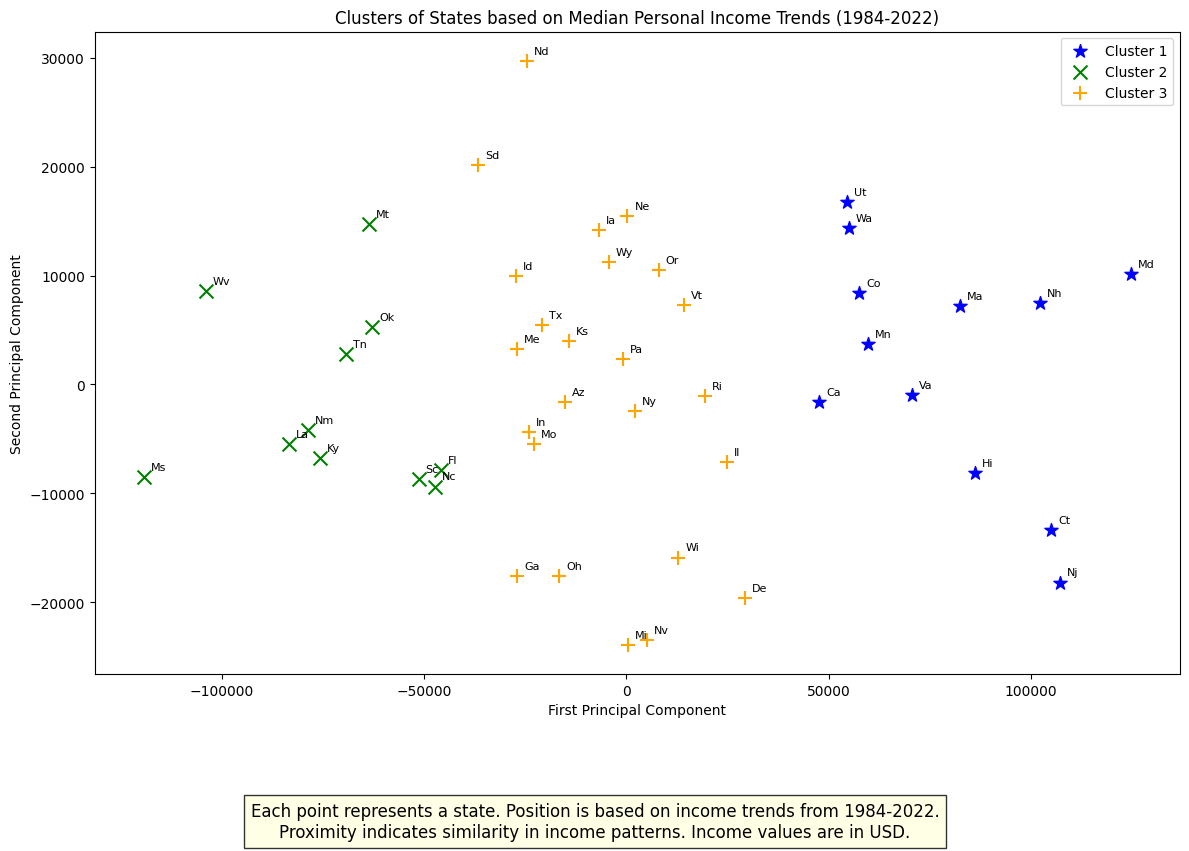

In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe with state incomes over time
# If you don't have 'df' defined, you'll need to load your data here

# Transpose the dataframe so states are rows and dates are columns
df_transposed = df.transpose()

# Use all columns except the first (which would be the state names) as features
features = df_transposed.iloc[:, 1:]

# Perform clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features)

# Perform dimensionality reduction
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features)

# Create a dictionary for correct state abbreviations
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Plotting
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'orange']
markers = ['*', 'x', '+']

for i in range(n_clusters):
    mask = cluster_labels == i
    plt.scatter(features_2d[mask, 0], features_2d[mask, 1],
                c=colors[i], marker=markers[i], s=100, label=f'Cluster {i+1}')

for i, state in enumerate(df_transposed.index):
    abbrev = state_abbrev.get(state, state)  # Use abbreviation if available, otherwise use full name
    plt.annotate(abbrev, (features_2d[i, 0], features_2d[i, 1]),
                 xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Clusters of States based on Median Personal Income Trends (1984-2022)')
plt.legend()

plt.tight_layout()

# Add explanatory text with improved legibility
plt.figtext(0.5, -0.05,
            "Each point represents a state. Position is based on income trends from 1984-2022.\n"
            "Proximity indicates similarity in income patterns. Income values are in USD.",
            ha="center", fontsize=12, bbox={"facecolor":"lightyellow", "alpha":0.8, "pad":5},
            wrap=True)

# Adjust the layout to make room for the text
plt.subplots_adjust(bottom=0.15)

plt.show()

In [21]:
# Transpose the dataframe so states are rows and years are columns
df_transposed = df.transpose()

# Use all columns as features for clustering and PCA
features = df_transposed.values

In [22]:
# Perform clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features)

# Perform dimensionality reduction
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

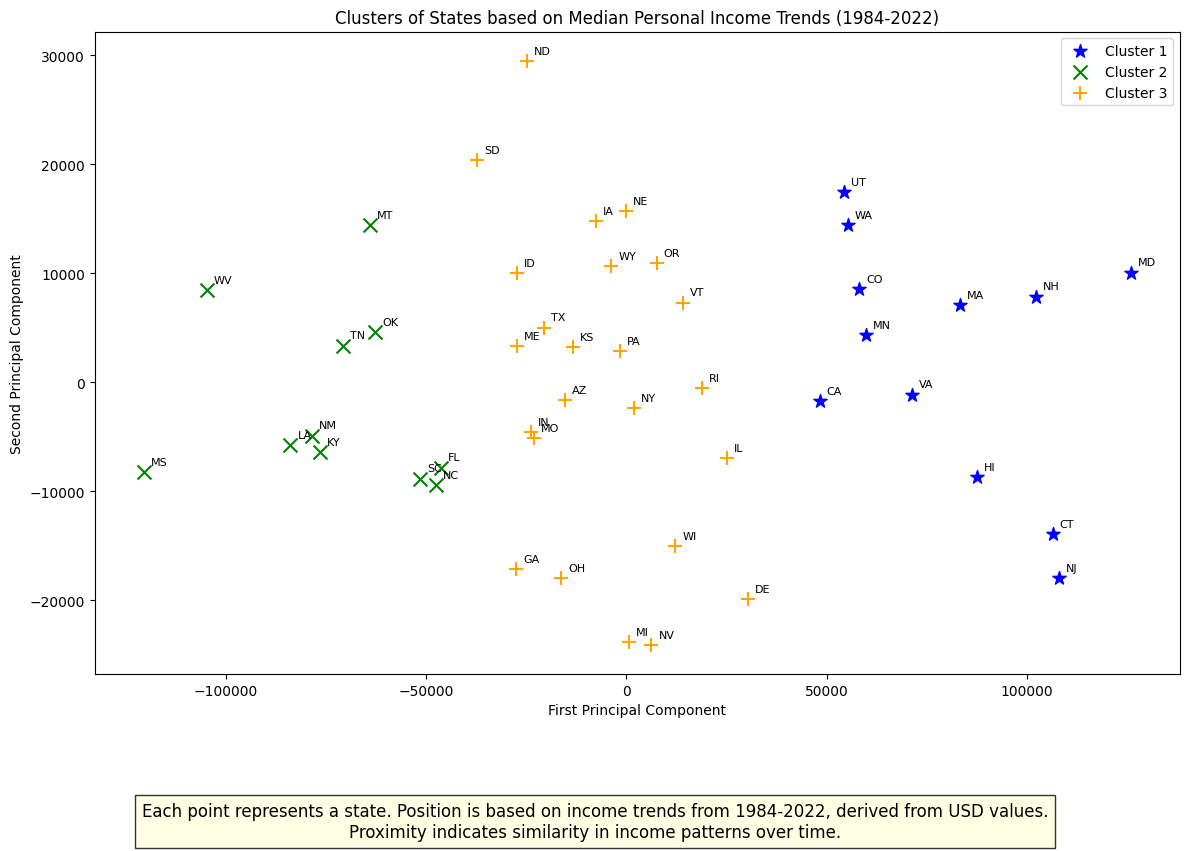

In [24]:
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'orange']
markers = ['*', 'x', '+']

for i in range(n_clusters):
    mask = cluster_labels == i
    plt.scatter(features_2d[mask, 0], features_2d[mask, 1],
                c=colors[i], marker=markers[i], s=100, label=f'Cluster {i+1}')

for i, state in enumerate(df_transposed.index):
    abbrev = state_abbrev.get(state, state).upper()
    plt.annotate(abbrev, (features_2d[i, 0], features_2d[i, 1]),
                 xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Clusters of States based on Median Personal Income Trends (1984-2022)')
plt.legend()

plt.tight_layout()

# Add explanatory text
plt.figtext(0.5, -0.05,
            "Each point represents a state. Position is based on income trends from 1984-2022, derived from USD values.\n"
            "Proximity indicates similarity in income patterns over time.",
            ha="center", fontsize=12, bbox={"facecolor":"lightyellow", "alpha":0.8, "pad":5},
            wrap=True)

plt.subplots_adjust(bottom=0.15)

plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler


# Transpose the dataframe so states are rows and years are columns
df_transposed = df.transpose()

In [26]:
# Use all columns as features for clustering
X = df_transposed.values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

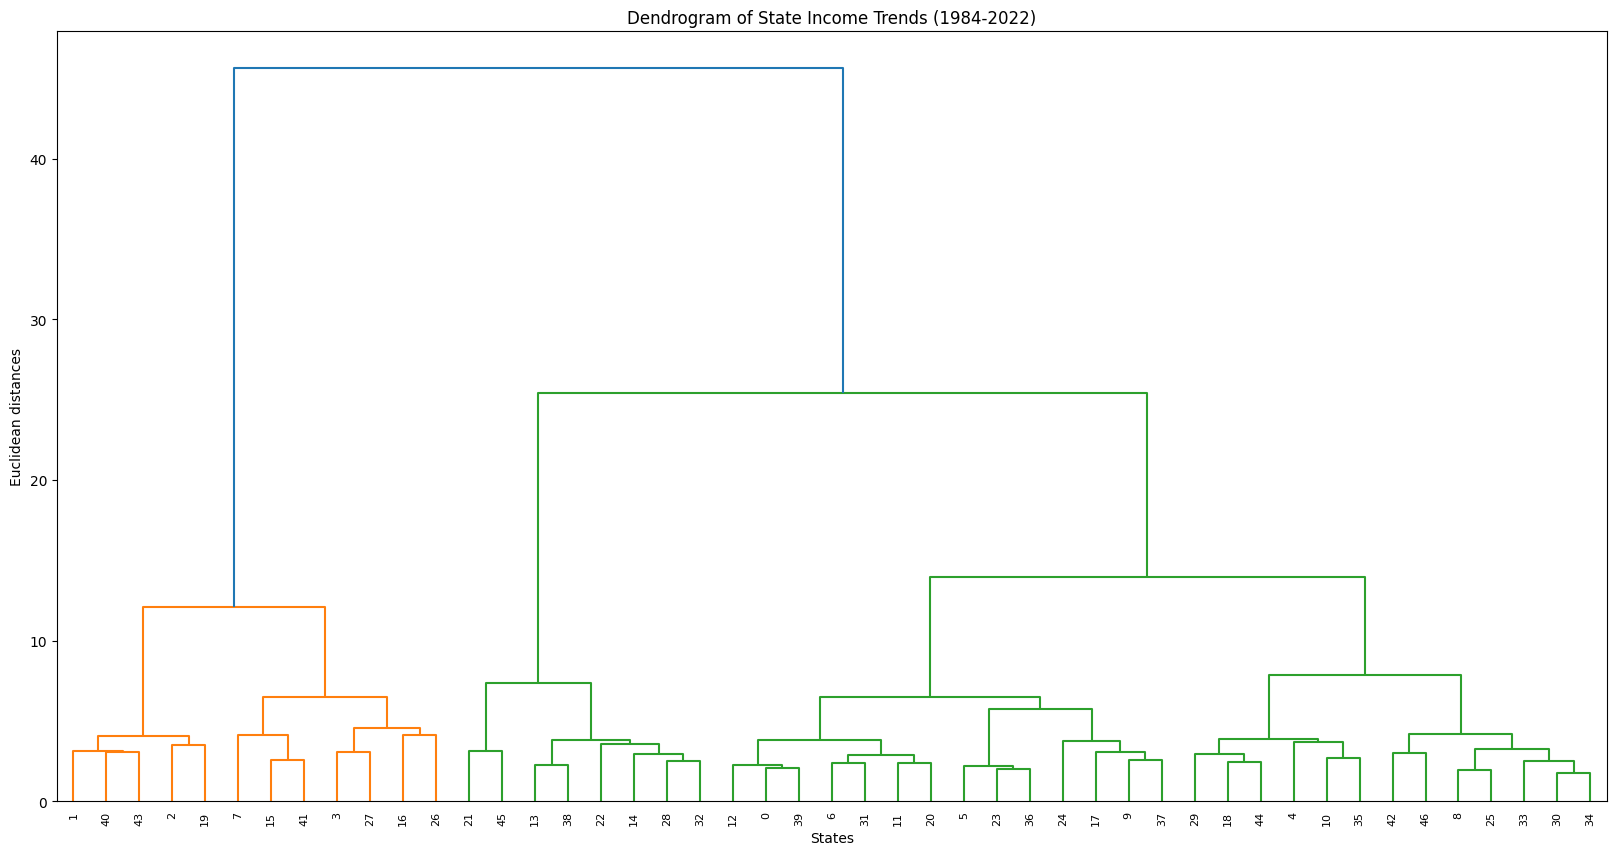

In [27]:
# Set up the plot
plt.figure(figsize=(20, 10))

# Create the dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method="ward"))

# Set the title and labels
plt.title('Dendrogram of State Income Trends (1984-2022)')
plt.xlabel('States')
plt.ylabel('Euclidean distances')

# Show the plot
plt.show()

In [28]:
# Perform Agglomerative Clustering
n_clusters = 3  # You can adjust this number
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster_labels = hc.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


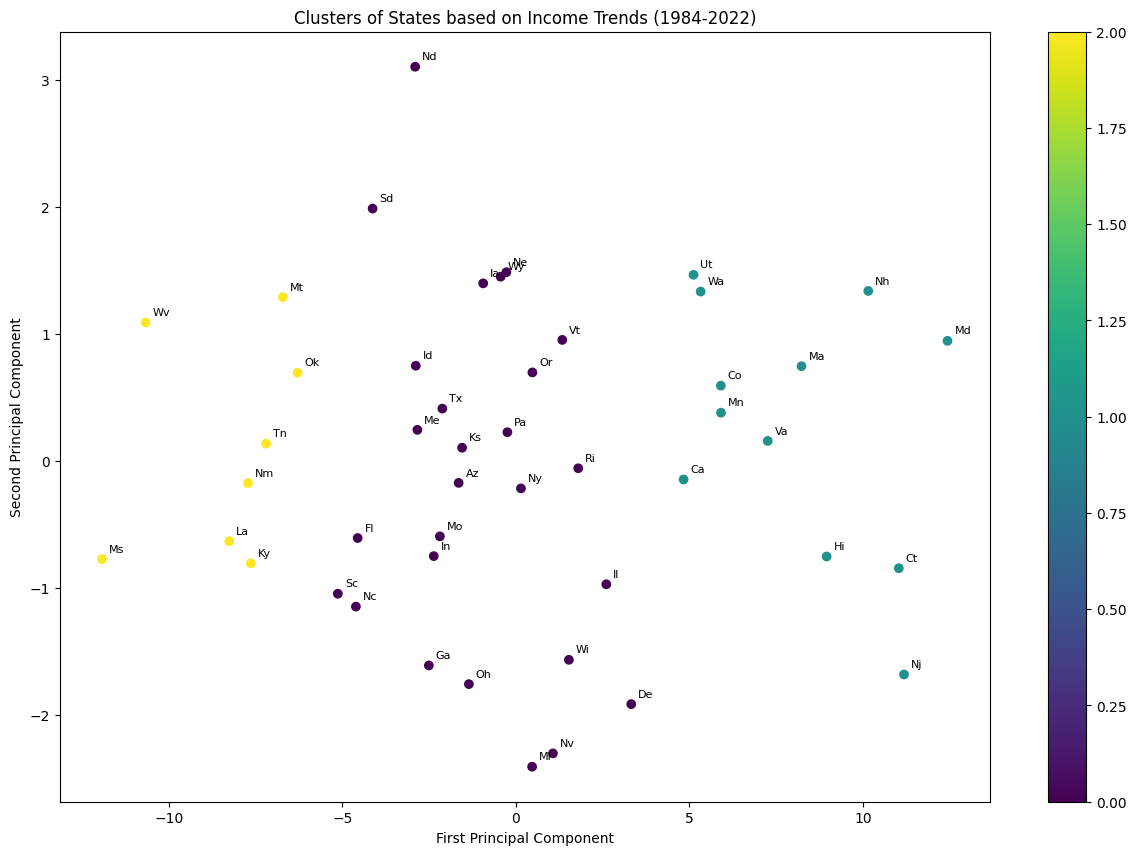

In [29]:
from sklearn.decomposition import PCA

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the clusters
plt.figure(figsize=(15, 10))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')

plt.title('Clusters of States based on Income Trends (1984-2022)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a color bar
plt.colorbar(scatter)

# Annotate points with state names
for i, state in enumerate(df_transposed.index):
    plt.annotate(state, (X_pca[i, 0], X_pca[i, 1]), xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.show()

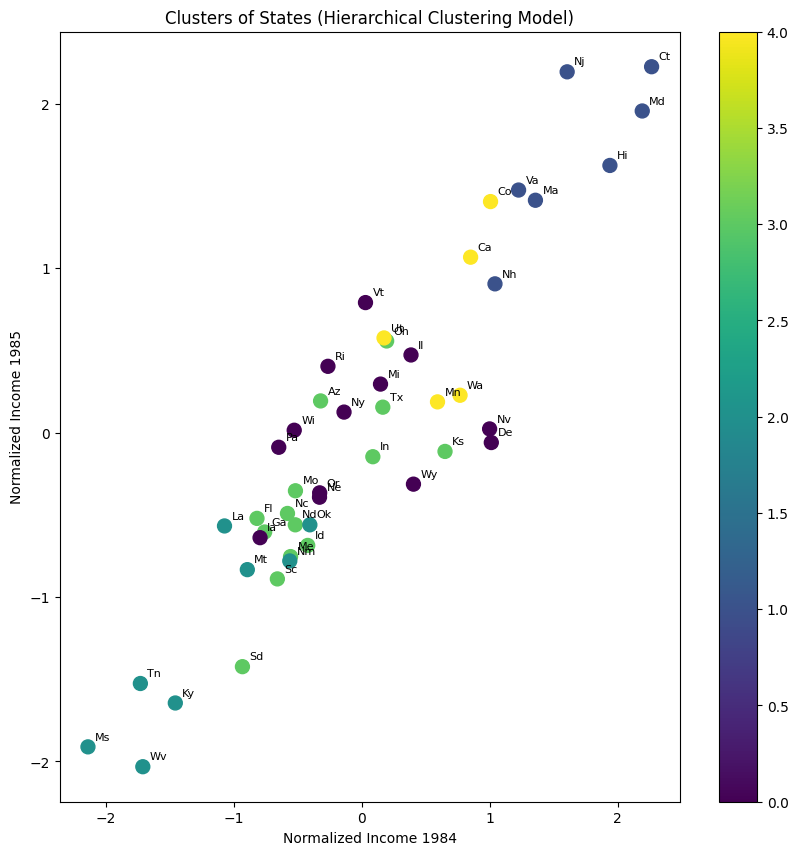

In [31]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Normalize the data
X = df_transposed.values
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Perform Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_normalized)

# Visualize the clusters
plt.figure(figsize=(10,10))
scatter = plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y_hc, s=100)

plt.title('Clusters of States (Hierarchical Clustering Model)')
plt.xlabel('Normalized Income 1984')
plt.ylabel('Normalized Income 1985')

# Add a color bar
plt.colorbar(scatter)

# Annotate points with state names
for i, state in enumerate(df_transposed.index):
    plt.annotate(state, (X_normalized[i, 0], X_normalized[i, 1]), xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.show()

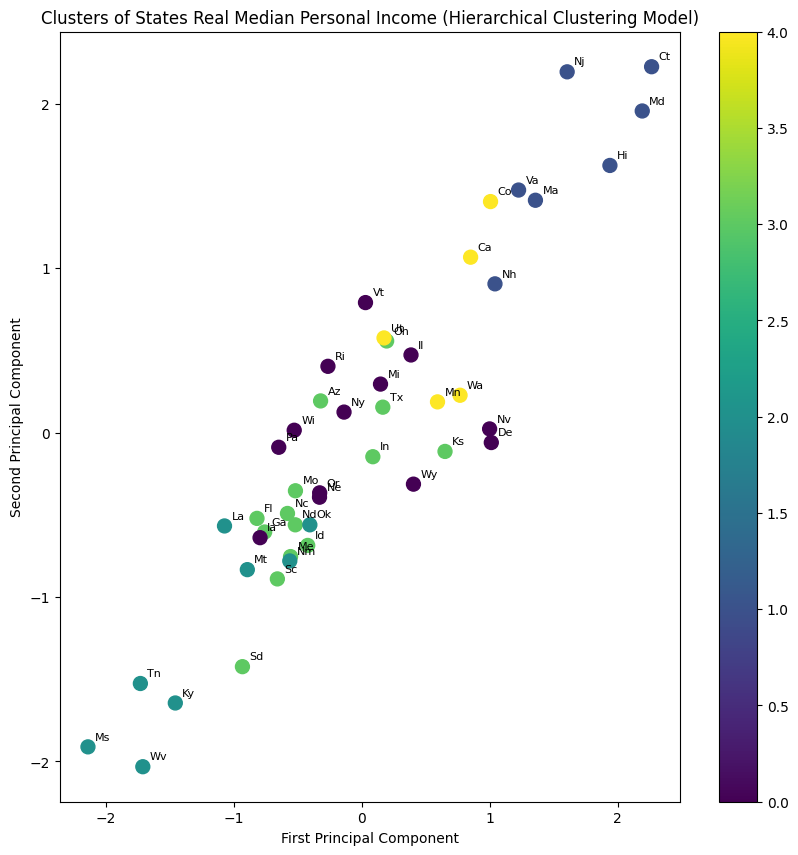

In [33]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Normalize the data
X = df_transposed.values
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Perform Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_normalized)

# Visualize the clusters
plt.figure(figsize=(10,10))
scatter = plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y_hc, s=100)

plt.title('Clusters of States Real Median Personal Income (Hierarchical Clustering Model)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a color bar
plt.colorbar(scatter)

# Annotate points with state names
for i, state in enumerate(df_transposed.index):
    plt.annotate(state, (X_normalized[i, 0], X_normalized[i, 1]), xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.show()

In [36]:
import numpy as np
import os

def compute_euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid)**2))

def assign_label_cluster(distance, data_point, centroids):
    index_of_minimum = min(distance, key=distance.get)
    return [index_of_minimum, data_point, centroids[index_of_minimum]]

def compute_new_centroids(cluster_label, centroids):
    return np.array(cluster_label + centroids)/2

def iterate_k_means(data_points, centroids, total_iteration):
    label = []
    cluster_label = []
    total_points = len(data_points)
    k = len(centroids)

    for iteration in range(0, total_iteration):
        for index_point in range(0, total_points):
            distance = {}
            for index_centroid in range(0, k):
                distance[index_centroid] = compute_euclidean_distance(data_points[index_point], centroids[index_centroid])
            label = assign_label_cluster(distance, data_points[index_point], centroids)
            centroids[label[0]] = compute_new_centroids(label[1], centroids[label[0]])

            if iteration == (total_iteration - 1):
                cluster_label.append(label)

    return [cluster_label, centroids]

def print_label_data(result):
    print("Result of k-Means Clustering: \n")
    for data in result[0]:
        print("data point: {}".format(data[1]))
        print("cluster number: {} \n".format(data[0]))
    print("Last centroids position: \n {}".format(result[1]))

def create_centroids():
    centroids = []
    centroids.append([5.0, 0.0])
    centroids.append([45.0, 70.0])
    centroids.append([50.0, 90.0])
    return np.array(centroids)

if __name__ == "__main__":
    filename = os.path.dirname(__file__) + "\/content/Real_Median_Personal_Income_in_the_United_States_x.xlsx"
    data_points = np.genfromtxt(filename, delimiter=",")
    centroids = create_centroids()
    total_iteration = 100

    [cluster_label, new_centroids] = iterate_k_means(data_points, centroids, total_iteration)
    print_label_data([cluster_label, new_centroids])
    print()

NameError: name '__file__' is not defined